In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import nltk
from nltk.corpus import stopwords
from collections import Counter
from wordcloud import WordCloud
from nltk.stem.porter import PorterStemmer
import string
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score
import pickle
%matplotlib inline

In [2]:
df = pd.read_csv('spam.csv')

In [3]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
df.shape

(5572, 5)

In [5]:
df.describe()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,50,12,6
unique,2,5169,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""",GE,"GNT:-)"""
freq,4825,30,3,2,2


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


## Tasks 
1. Data Cleaning
2. EDA
3. Text Preprocessing
4. Model Building
5. Evaluation
6. Improvement

## 1. Data Cleaning

In [7]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'], inplace=True)

In [8]:
df.sample(5)

,v1,v2
4143,ham,That's a shame! Maybe cld meet for few hrs tomo?
4152,spam,URGENT!! Your 4* Costa Del Sol Holiday or �500...
2724,ham,Nope... C �_ then...
1794,ham,How much i gave to you. Morning.
1208,ham,Also maaaan are you missing out


In [9]:
# Renaming the columns for better understanding

df.rename(columns={'v1':'target','v2':'text'}, inplace=True)

In [10]:
df.sample(5)

,target,text
4009,spam,Wan2 win a Meet+Greet with Westlife 4 U or a m...
3967,ham,Did u turn on the heater? The heater was on an...
3183,ham,Good morning pookie pie! Lol hope I didn't wak...
4695,ham,A guy who gets used but is too dumb to realize...
3602,ham,"I'm not sure, I was just checking out what was..."


In [11]:
encoder = LabelEncoder()

In [12]:
# Changing the target values  
# spam = 1, ham = 0

df['target'] = encoder.fit_transform(df['target'])

In [13]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [14]:
# Checking the missing values

df.isnull().sum()

target    0
text      0
dtype: int64

In [15]:
# Checking for duplicate values

df.duplicated().sum()

403

In [16]:
# Removing duplicates 

df = df.drop_duplicates(keep='first')

In [17]:
df.duplicated().sum()

0

In [18]:
df.shape

(5169, 2)

## 2. EDA

In [19]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [20]:
df['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

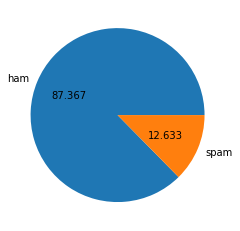

In [21]:
plt.pie(df['target'].value_counts(), labels=['ham','spam'],autopct='%0.3f')
plt.show()

Since Data is imbalanced.
ham is 87.367% and spam is 12.633% 

In [23]:
# Calculating number of character and append the columns in df

df['num_character'] = df['text'].apply(len)

In [24]:
df.head()

,target,text,num_character
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [25]:
# Calculating number of words using nltk.word_tokenize and appending that column in df

df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [26]:
df.head()

,target,text,num_character,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [27]:
# Calculating number of sentences using nltk.sent_tokenize and appending that column in df

df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [28]:
df.head()

,target,text,num_character,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [29]:
df[['num_character','num_words','num_sentences']].describe()

,num_character,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.923776,18.456375,1.962275
std,58.174846,13.323322,1.433892
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [30]:
# Checking for Ham

df[df['target'] == 0][['num_character','num_words','num_sentences']].describe()

,num_character,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.456820,17.123339,1.815545
std,56.356802,13.491315,1.364098
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [31]:
# Checking for Spam

df[df['target'] == 1][['num_character','num_words','num_sentences']].describe()

,num_character,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.479326,27.675345,2.977029
std,30.014336,7.011513,1.493676
min,13.000000,2.000000,1.000000
25%,131.000000,25.000000,2.000000
50%,148.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,223.000000,46.000000,9.000000


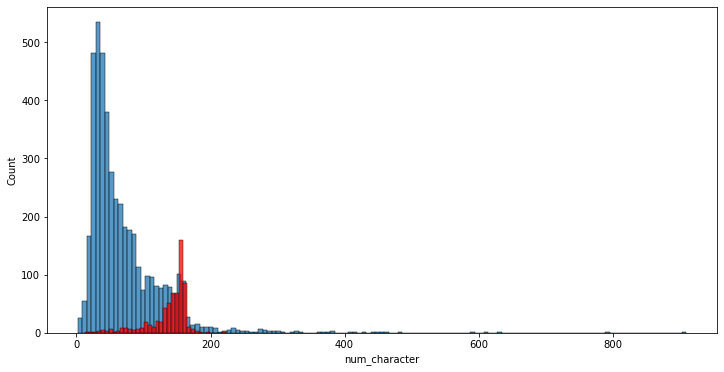

In [32]:
# Ploting Histogram for number of character and Target

plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['num_character'])
sns.histplot(df[df['target']==1]['num_character'],color='red')
plt.show()

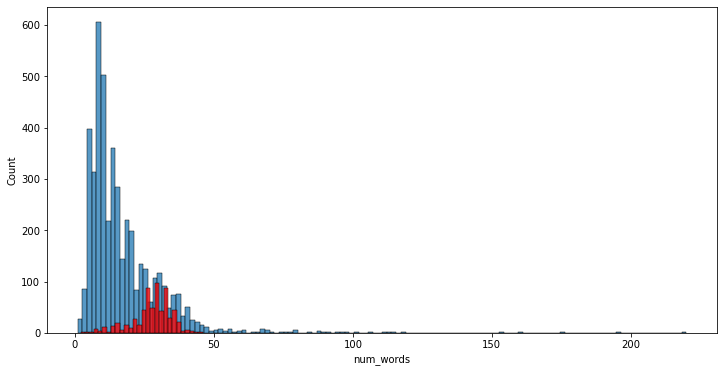

In [33]:
# Ploting Histogram for number of words and Target

plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['num_words'])
sns.histplot(df[df['target']==1]['num_words'],color='red')
plt.show()

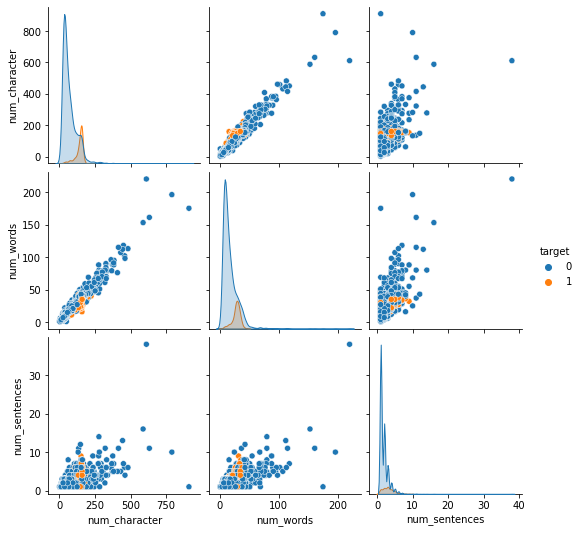

In [34]:
# Pairplot for df, target

sns.pairplot(df,hue='target')
plt.show()

In [35]:
# Correlation of df

df.corr()

,target,num_character,num_words,num_sentences
target,1.000000,0.382785,0.263143,0.269132
num_character,0.382785,1.000000,0.966087,0.626197
num_words,0.263143,0.966087,1.000000,0.680924
num_sentences,0.269132,0.626197,0.680924,1.000000


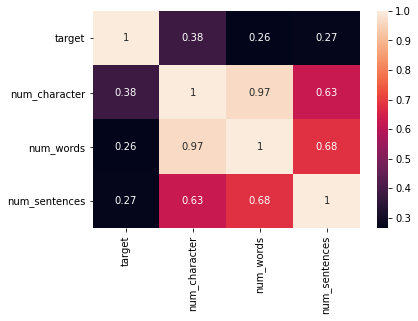

In [36]:
# Heatmap

sns.heatmap(df.corr(),annot=True)
plt.show()

## 3. Data Preprocessing
1. Lower case
2. Tokenization
3. Removing special characters
4. Removing stop words and punctuation
5. Stemming

In [37]:
# Creating a function which will transform the text


def transform_text(text):
    text = text.lower()    # text will get lower case
    text = nltk.word_tokenize(text)  # Return the list of syllables of words.
    
    y=[]
    for i in text:
        if i.isalnum(): # checking if all characters in the string are alphanumeric (either alphabets or numbers)
            y.append(i)
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))  # ps.stem is the process of producing morphological variants of a root/base word.
            
    return " ".join(y)

In [38]:
# checking stops words 

stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [39]:
# Checking Punctuation

string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [41]:
ps = PorterStemmer()

In [42]:
# Checking the functions

transform_text('HI How Are you hello?')

'hi hello'

In [43]:
transform_text('did you like my presentation on ML?')

'like present ml'

In [44]:
transform_text('I loved the Yt lectures on ML. How about you?')

'love yt lectur ml'

In [45]:
# Applying transform_text function to text column

df['transformed_text'] = df['text'].apply(transform_text)

In [46]:
df.head()

,target,text,num_character,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [47]:
wc = WordCloud(width=500,height=500, min_font_size=10,background_color='white')

In [48]:
# Checking maximum number of word occurs in Spam

spam_wc = wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=" "))

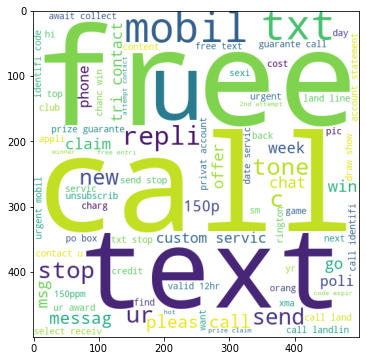

In [50]:
plt.figure(figsize=(12,6))
plt.imshow(spam_wc)
plt.show()

In [51]:
# Checking maximum number of word occurs in Ham

ham_wc = wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep=" "))

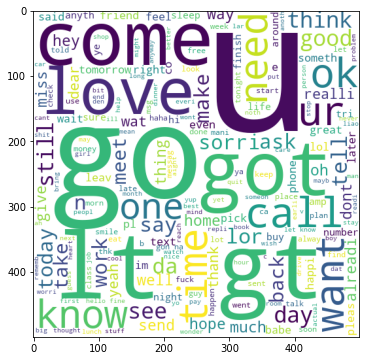

In [52]:
plt.figure(figsize=(12,6))
plt.imshow(ham_wc)
plt.show()

In [53]:
# Splitting the text for Spam

spam_corpus = []

for msg in df[df['target']==1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [54]:
len(spam_corpus)

9941

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


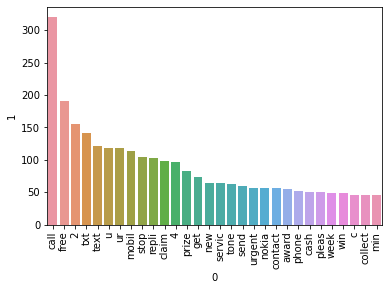

In [56]:
# Plotting the top 30 common words in the Spam 

sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0],pd.DataFrame(Counter(spam_corpus).most_common(30))[1])

plt.xticks(rotation = 'vertical')
plt.show()

In [57]:
# Splitting the text for Spam

ham_corpus = []

for msg in df[df['target']==0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [58]:
len(ham_corpus)

35303

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


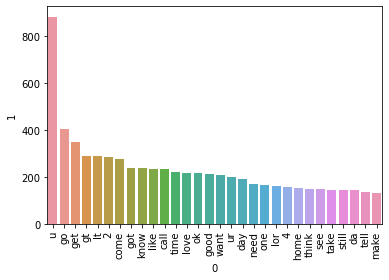

In [59]:
# Plotting the top 30 common words in the Ham 

sns.barplot(pd.DataFrame(Counter(ham_corpus).most_common(30))[0],pd.DataFrame(Counter(ham_corpus).most_common(30))[1])

plt.xticks(rotation = 'vertical')
plt.show()

## 4. Model Building

In [60]:
cv = CountVectorizer()
tfv = TfidfVectorizer(max_features=3000)

### CountVectorizer

In [61]:
X = cv.fit_transform(df['transformed_text']).toarray()

In [62]:
y = df['target'].values

In [64]:
# Splitting the df into Train data and test data

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=2)

In [65]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [71]:
gnb.fit(X_train, y_train)
y_pred1 = gnb.predict(X_test)
print("Accuracy : ",accuracy_score(y_test,y_pred1))
print("\n")
print("Confusion Matrix \n",confusion_matrix(y_test,y_pred1))
print("\n")
print("Precision : ",precision_score(y_test,y_pred1))

Accuracy :  0.8781431334622823


Confusion Matrix 
 [[790 106]
 [ 20 118]]


Precision :  0.5267857142857143


In [72]:
mnb.fit(X_train, y_train)
y_pred2 = mnb.predict(X_test)
print("Accuracy : ",accuracy_score(y_test,y_pred2))
print("\n")
print("Confusion Matrix \n",confusion_matrix(y_test,y_pred2))
print("\n")
print("Precision : ",precision_score(y_test,y_pred2))

Accuracy :  0.965183752417795


Confusion Matrix 
 [[872  24]
 [ 12 126]]


Precision :  0.84


In [73]:
bnb.fit(X_train, y_train)
y_pred3 = bnb.predict(X_test)
print("Accuracy : ",accuracy_score(y_test,y_pred3))
print("\n")
print("Confusion Matrix \n",confusion_matrix(y_test,y_pred3))
print("\n")
print("Precision : ",precision_score(y_test,y_pred3))

Accuracy :  0.971953578336557


Confusion Matrix 
 [[894   2]
 [ 27 111]]


Precision :  0.9823008849557522


### TfidfVectorize

In [74]:
X = tfv.fit_transform(df['transformed_text']).toarray()
y = df['target'].values

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=2)

In [77]:
gnb.fit(X_train, y_train)
y_pred1 = gnb.predict(X_test)
print("Accuracy : ",accuracy_score(y_test,y_pred1))
print("\n")
print("Confusion Matrix \n",confusion_matrix(y_test,y_pred1))
print("\n")
print("Precision : ",precision_score(y_test,y_pred1))

Accuracy :  0.8704061895551257


Confusion Matrix 
 [[788 108]
 [ 26 112]]


Precision :  0.509090909090909


In [78]:
mnb.fit(X_train, y_train)
y_pred2 = mnb.predict(X_test)
print("Accuracy : ",accuracy_score(y_test,y_pred2))
print("\n")
print("Confusion Matrix \n",confusion_matrix(y_test,y_pred2))
print("\n")
print("Precision : ",precision_score(y_test,y_pred2))

Accuracy :  0.971953578336557


Confusion Matrix 
 [[896   0]
 [ 29 109]]


Precision :  1.0


In [79]:
bnb.fit(X_train, y_train)
print("Accuracy : ",accuracy_score(y_test,y_pred3))
print("\n")
print("Confusion Matrix \n",confusion_matrix(y_test,y_pred3))
print("\n")
print("Precision : ",precision_score(y_test,y_pred3))

Accuracy :  0.971953578336557


Confusion Matrix 
 [[894   2]
 [ 27 111]]


Precision :  0.9823008849557522


### Using TfidfVectorize and  MultinomialNB

Precision Score of MultinomialNB is highest among all.

In [80]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)

In [81]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt
}

In [82]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [83]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9748549323017408, 0.9745762711864406)

In [84]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    print("**"*30)
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9748549323017408
Precision -  0.9745762711864406
************************************************************
For  KN
Accuracy -  0.9052224371373307
Precision -  1.0
************************************************************
For  NB
Accuracy -  0.971953578336557
Precision -  1.0
************************************************************
For  DT
Accuracy -  0.9313346228239845
Precision -  0.8252427184466019
************************************************************
For  LR
Accuracy -  0.9564796905222437
Precision -  0.9696969696969697
************************************************************
For  RF
Accuracy -  0.9758220502901354
Precision -  0.9829059829059829
************************************************************
For  AdaBoost
Accuracy -  0.9613152804642167
Precision -  0.9454545454545454
************************************************************
For  BgC
Accuracy -  0.9593810444874274
Precision -  0.8692307692307693
****************************

In [85]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [86]:
performance_df 

,Algorithm,Accuracy,Precision
1,KN,0.905222,1.000000
2,NB,0.971954,1.000000
5,RF,0.975822,0.982906
8,ETC,0.979691,0.975610
0,SVC,0.974855,0.974576
4,LR,0.956480,0.969697
6,AdaBoost,0.961315,0.945455
9,GBDT,0.946809,0.927835
7,BgC,0.959381,0.869231
3,DT,0.931335,0.825243


Naive Bayes is the best for our classifier 

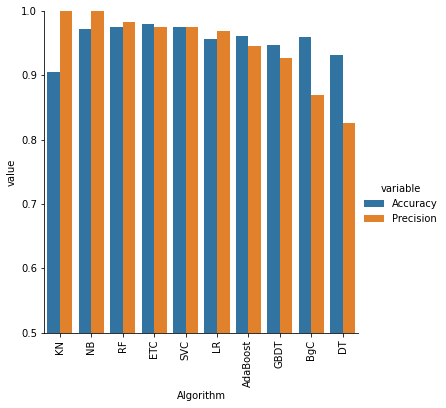

In [89]:
# Plotting

sns.catplot(x = 'Algorithm', y='value', hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [90]:
pickle.dump(tfv,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))